# Linear Regression

`Linear Regression` is a supervised machine learning algorithm where the predicted output is `continuous` and has a `constant slope`. It's used to predict values within a `continuous range`, (e.g. sales, price) rather than trying to classify them into categories (e.g. cat, dog). There are two main types:

- **Simple regression** - only one independent variable (e.g. sales)
- **Multiple regression** - more than one independent variables (e.g. sales, price)

## Simple Linear Regression

Simple linear regression is an approach for predicting a `response` using a single feature. It is assumed that the two variables are `linearly related`. Hence, we try to find a linear function that predicts the response value(y) as accurately as possible as a function of the feature or independent variable(x).

In [182]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [183]:
# load the data 
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

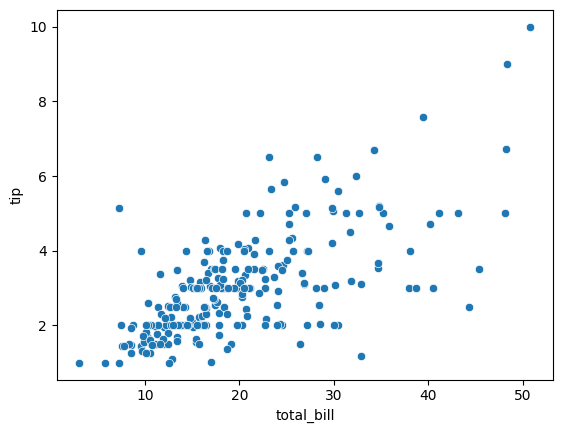

In [184]:
sns.scatterplot(x='total_bill', y='tip', data=df)

In [185]:
# remove outliers by using IQR
Q1 = df[['total_bill', 'tip']].quantile(0.25)
Q3 = df[['total_bill', 'tip']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['total_bill', 'tip']] < (Q1 - 1.5 * IQR)) | (df[['total_bill', 'tip']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [186]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

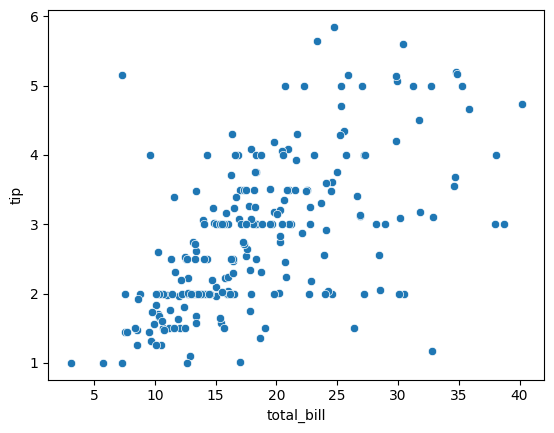

In [187]:
sns.scatterplot(x='total_bill', y='tip', data=df)

In [188]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [189]:
# see maximum value in total_bill and tip column after removing outliers
df[['total_bill', 'tip']].max()

total_bill    40.17
tip            5.85
dtype: float64

In [190]:
# split the data into X and y
X = df[['total_bill']]
y = df['tip']

In [191]:
# # Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [192]:
# slit the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [193]:
# call the model 
model = LinearRegression()

In [194]:
# train the model 
model.fit(X_train, y_train)

LinearRegression()

In [195]:
# take out model intercept and slop, make an equation
print(model.intercept_)
print(model.coef_)
print('y = ', model.intercept_, '+', model.coef_, '* X')

2.7871937340929467
[0.63449883]
y =  2.7871937340929467 + [0.63449883] * X


In [196]:
model.predict([[5]])

array([5.95968788])

In [197]:
y_pred = model.predict(X_test)

In [198]:
# evaluate the model
print('MSE = ', mean_squared_error(y_test, y_pred))
print('R2 = ', r2_score(y_test, y_pred))
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE =  0.6183881018183777
R2 =  0.4181026895216676
RMSE =  0.7863765648964736


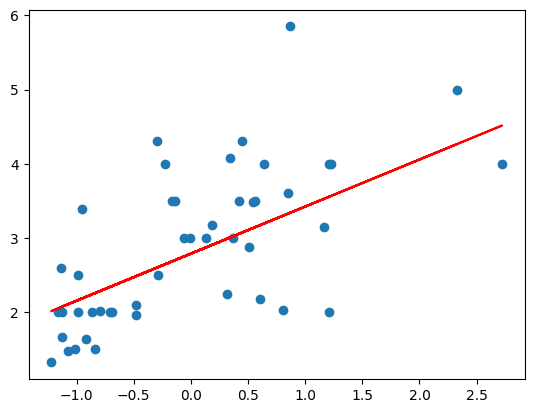

In [199]:
# plot the model and data
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.show()